In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

# read data and store in dataframes
raw_data = pd.read_csv('Raw_Data\data.csv')
wx1 = pd.read_csv('Raw_Data\wx1.csv')
wx2 = pd.read_csv('Raw_Data\wx2.csv')
wx3 = pd.read_csv('Raw_Data\wx3.csv')
wx4 = pd.read_csv('Raw_Data\wx4.csv')

# convert original time data (str) to DD-MM-YYYY hh:mm:ss (datetime). impt to convert to the format!!
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'], format='%d/%m/%Y %H:%M',)
wx1['datetime'] = pd.to_datetime(wx1['datetime'], format='%d/%m/%Y %H:%M',)
wx2['datetime'] = pd.to_datetime(wx2['datetime'], format='%d/%m/%Y %H:%M',)
wx3['datetime'] = pd.to_datetime(wx3['datetime'], format='%d/%m/%Y %H:%M',)
wx4['datetime'] = pd.to_datetime(wx4['datetime'], format='%d/%m/%Y %H:%M',)

In [3]:
# prints earliest and latest date in each file
print ('raw_data min/max date: %s / %s' % (raw_data.datetime.min().date(), raw_data.datetime.max().date()))
print ('wx1  min/max date: %s / %s' % ( wx1.datetime.min().date(),  wx1.datetime.max().date()))
print ('wx2  min/max date: %s / %s' % ( wx2.datetime.min().date(),  wx2.datetime.max().date()))
print ('wx3  min/max date: %s / %s' % ( wx3.datetime.min().date(),  wx3.datetime.max().date()))
print ('wx4  min/max date: %s / %s' % ( wx4.datetime.min().date(),  wx4.datetime.max().date()))

# prints total number of days in each file
print ('')
print ('Number of days in raw_data: %d' % ((raw_data.datetime.max() - raw_data.datetime.min()).days + 1))
print ('Number of days in wx1:  %d' % (( wx1.datetime.max() -  wx1.datetime.min()).days + 1))
print ('Number of days in wx2:  %d' % (( wx2.datetime.max() -  wx2.datetime.min()).days + 1))
print ('Number of days in wx3:  %d' % (( wx3.datetime.max() -  wx3.datetime.min()).days + 1))
print ('Number of days in wx4:  %d' % (( wx4.datetime.max() -  wx4.datetime.min()).days + 1))

# prints total number of rows in each file
# .shape returns dimensions in (r, c), .shape[0] returns no. rows
print ('')
print ('raw_data shape: %d rows' % raw_data.shape[0])
print ('wx1 shape: %d rows'  % wx1.shape[0])
print ('wx2 shape: %d rows'  % wx2.shape[0])
print ('wx3 shape: %d rows'  % wx3.shape[0])
print ('wx4 shape: %d rows'  % wx4.shape[0])

raw_data min/max date: 2014-07-24 / 2016-05-26
wx1  min/max date: 2014-01-01 / 2017-01-01
wx2  min/max date: 2014-01-01 / 2017-01-01
wx3  min/max date: 2014-01-01 / 2017-01-01
wx4  min/max date: 2016-05-30 / 2016-12-22

Number of days in raw_data: 673
Number of days in wx1:  1096
Number of days in wx2:  1096
Number of days in wx3:  1096
Number of days in wx4:  206

raw_data shape: 53761 rows
wx1 shape: 52115 rows
wx2 shape: 51996 rows
wx3 shape: 58922 rows
wx4 shape: 2240 rows


In [4]:
# checking if there are null values
raw_data.isnull().sum(axis=0).head(15)

datetime    0
 Power      0
dtype: int64

In [5]:
(raw_data[' Power'].value_counts().tail())
wx4.Temperature.value_counts().head()
wx3.Temperature.value_counts().head()
wx2.Temperature.value_counts().head()
wx1.Temperature.value_counts().head()

# obtains unique power values and sorts them in ascending order
raw_data_unique = raw_data[' Power'].unique()
#raw_data_unique_sorted = np.sort(raw_data_unique)
raw_data_unique

array([ 499.2479958,  530.2571881,  477.5415612, ..., 3434.268046 ,
       3460.625859 , 4953.718468 ])

In [6]:
# reindexing to datetime
# use inplace to update the data. if False, will return a copy.
raw_data.set_index('datetime', inplace=True)
wx1.set_index('datetime', inplace=True)
wx2.set_index('datetime', inplace=True)
wx3.set_index('datetime', inplace=True)
wx4.set_index('datetime', inplace=True)

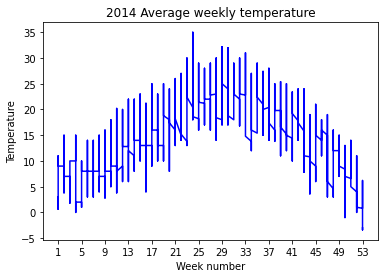

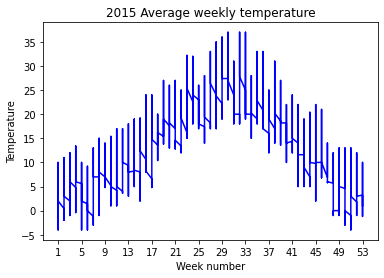

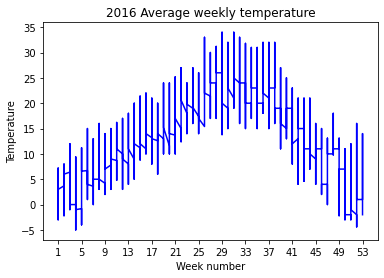

SyntaxError: 'return' outside function (<ipython-input-66-30eb153d97bb>, line 56)

In [66]:
### FOR wx1 ONLY ###

# first initializes and empty df
# then groups the weekly data and takes its average, and adds new column with corresponding number. 
# since weekno is returned as string, convert it to int and add 1 for easier understanding (index starts at 0)
# then removes all rows with null data values    

# weekly data for 2014
tfour = pd.DataFrame()
tfour["Weekno"] = wx1["2014-"].index.to_series().apply(lambda x: x.strftime("%U"))
tfour["Weekno"] = pd.to_numeric(tfour["Weekno"])
tfour["Weekno"] += 1
tfour["Temp"] = wx1["Temperature"]
tfour.dropna()


# weekly data for 2015
tfive = pd.DataFrame()
tfive["Weekno"] = wx1["2015-"].index.to_series().apply(lambda x: x.strftime("%U"))
tfive["Weekno"] = pd.to_numeric(tfive["Weekno"])
tfive["Weekno"] += 1
tfive["Temp"] = wx1["Temperature"]
tfive.dropna()  

# weekly data for 2016
tsix = pd.DataFrame()
tsix["Weekno"] = wx1["2016-"].index.to_series().apply(lambda x: x.strftime("%U"))
tsix["Weekno"] = pd.to_numeric(tsix["Weekno"])
tsix["Weekno"] += 1
tsix["Temp"] = wx1["Temperature"]
tsix.dropna()  

# initializing variables required for the automatic plotting
all_df = [tfour, tfive, tsix]
year = 2013 

import matplotlib.pyplot as plt

# use for loop to plot all graphs for the 3 years automatically
for x in all_df:
    
    # plots average weekly temperature for the years 2014, 2015, 2016
    fig, ax = plt.subplots()
    ax.plot(x["Weekno"], x["Temp"], color = "blue")
    ax.set_xlabel('Week number')
    ax.set_ylabel('Temperature')

    # set stepsize as 4 so each tick represents the beginning of the first week of each month
    ax.xaxis.set_ticks(np.arange(1, 54, 4))     
    ax.yaxis.set_ticks(np.arange(-5, 36, 5))
    year += 1
    plt.title(str(year) + " Average weekly temperature")
    plt.show()

# error with return for now, although graphs still print as expected
return year

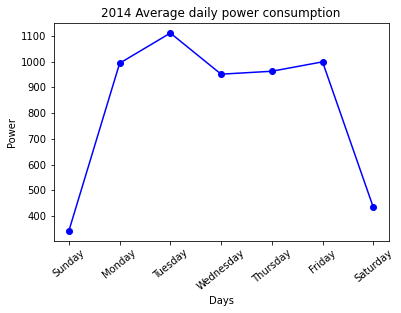

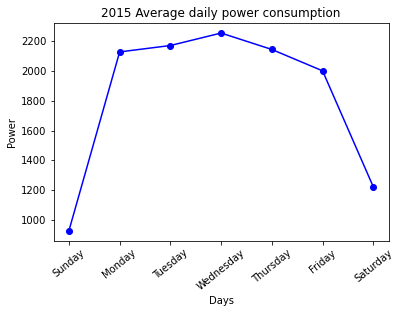

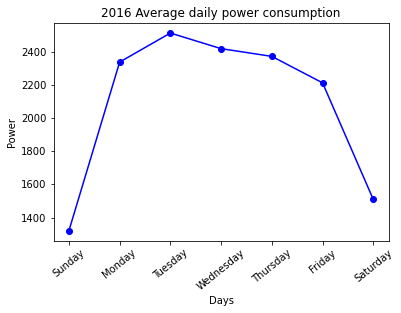

KeyError: 'Power'

In [68]:
### DAILY POWER USAGE USING AVG OF POWER USAGE ON EACH DAY OF THE WEEK ###

# first initializes an empty df
# then groups the daily data and takes its average, and adds new column with corresponding day. 
# then append power data

# avg daily power consumption for 2014
day_tfourp = pd.DataFrame()
day_tfourp["Day"] = raw_data["2014-"].index.to_series().apply(lambda x: x.strftime("%A"))
day_tfourp["Power"] = raw_data[" Power"] 

# avg daily power consumption for 2015
day_tfivep = pd.DataFrame()
day_tfivep["Day"] = raw_data["2015-"].index.to_series().apply(lambda x: x.strftime("%A"))
day_tfivep["Power"] = raw_data[" Power"] 

# avg daily power consumption for 2016
day_tsixp = pd.DataFrame()
day_tsixp["Day"] = raw_data["2016-"].index.to_series().apply(lambda x: x.strftime("%A"))
day_tsixp["Power"] = raw_data[" Power"] 

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# groups all data according to the days and reindex with week beginning Sunday
day_tfourp = day_tfourp.groupby(day_tfourp["Day"]).mean().reindex(days)
day_tfivep = day_tfivep.groupby(day_tfivep["Day"]).mean().reindex(days)
day_tsixp = day_tsixp.groupby(day_tsixp["Day"]).mean().reindex(days)

# initializing variables required for the automatic plotting
coll_day = [day_tfourp, day_tfivep, day_tsixp, day_tsevp]
year = 2013

# use for loop to plot all graphs for the 3 years automatically
import matplotlib.pyplot as plt

for x in coll_day:
    # plots average daily power consumption for the years 2014, 2015, 2016
    fig, ax = plt.subplots()
    ax.plot(x.index, x["Power"], color = "blue", marker = "o")
    plt.xlabel('Days')
    plt.ylabel('Power')
    plt.xticks(days,rotation=39)
    year += 1
    plt.title(str(year) + " Average daily power consumption")
    plt.show()    
    #plt.savefig(""'avgdays'+str(year)+".png", bbox_inches = 'tight')
    # doesn't save the images and also doesn't save with displayed title...will remedy tmr
    # also error with x["Power"] in ax.plot
return year


In [ ]:
###  PUBLIC HOLIDAY POWER CONSUMPTION ###

ph = ["phdate1", "phdate2"] etc
# remember to add names to the public holidays
# add in power data
# organize in dataframe and plot accordingly

In [ ]:
### POWER AND TEMPERATURE CORRELATION GRAPHS ###

# to see if there is a relation bet temperature & power consumption for weekly & weekday/weekend trends

In [7]:
#q = pd.merge_asof(raw_data, wx1, left_on="datetime", right_on="datetime")
#q1 = pd.merge_asof(q, wx2, left_on="datetime", right_on="datetime")
#q2 = pd.merge_asof(q1, wx3, left_on="datetime", right_on="datetime")
#q3 = pd.merge_asof(q2, wx4, left_on="datetime", right_on="datetime")
#q3

,datetime,Power,Temperature_x,Temperature_y,Temperature_x,Temperature_y
0,2014-07-24 12:30:00,499.247996,22.0,21.0,19.0,NaN
1,2014-07-24 12:45:00,530.257188,21.0,21.0,19.0,NaN
2,2014-07-24 13:00:00,477.541561,21.0,21.8,19.0,NaN
3,2014-07-24 13:15:00,463.587425,22.0,21.8,19.0,NaN
4,2014-07-24 13:30:00,395.367202,22.0,21.8,19.0,NaN
...,...,...,...,...,...,...
53756,2016-05-26 19:15:00,1821.790047,24.0,25.0,22.0,NaN
53757,2016-05-26 19:30:00,1581.468807,24.0,25.0,22.0,NaN
53758,2016-05-26 19:45:00,784.532565,24.0,25.0,22.0,NaN
53759,2016-05-26 20:00:00,541.110405,23.8,24.0,21.7,NaN
